In [ ]:
!pip install Ipython

In [ ]:
!pip install nb_black

     |████████████████████████████████| 143kB 5.4MB/s 
     |████████████████████████████████| 727kB 8.2MB/s 
     |████████████████████████████████| 747kB 11.3MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-cp37-none-any.whl size=5300 sha256=b98e23cf37823aea0c23b7c27cd9315bd08e6a87a2f75e674714dc98de3d0a96
  Stored in directory: /root/.cache/pip/wheels/35/6d/99/856a3401e3a2153f51223f1be990e4b30f80f9e4bd1604ae9b
Successfully built nb-black
  Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20


In [ ]:
# debugging and formatter
from IPython.core.debugger import set_trace



import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pickle
import time

%matplotlib inline

In [ ]:
import IPython
print(IPython.__version__)

5.5.0


In [ ]:
!pip install --upgrade IPython

     |████████████████████████████████| 788kB 6.2MB/s 
     |████████████████████████████████| 368kB 10.4MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.19 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.25.0 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0


In [ ]:
#!pipenv install faker

Faker is a Python package that generates fake data for you. Whether you need to create datasets that contain certains types of features and targets, or anonymize data taken from a production service, Faker is for you.


In [ ]:
# https://faker.readthedocs.io/
!pip install faker
from faker import Faker
fake = Faker()

     |████████████████████████████████| 1.2MB 7.1MB/s 


# Creating synthetic data

### Timeseries 

In [ ]:
def faker_timeseries_rows(num=1, seed=None):
    """
    """
    fake.seed_instance(seed)

    time_gen = fake.time_series(start_date=f"-{num}d", end_date="now", precision=3600)

    output = [
        {
            "datetime": next(time_gen),
            "name": fake.last_name(),
            "email": fake.free_email(),
            "country": fake.country(),
        }
        for x in range(num)
    ]
    return output

<IPython.core.display.Javascript object>

In [ ]:
df = pd.DataFrame(faker_timeseries_rows(10, seed=0))
df.head(5)


datetime  ...  country
0   (2021-04-19 14:12:15, 3039.918665490173)  ...     Iraq
1  (2021-04-19 15:12:15, 3305.6435944264745)  ...  Burundi
2  (2021-04-19 16:12:15, 1014.6162398389338)  ...  Georgia
3  (2021-04-19 17:12:15, 355.54804077293176)  ...  Germany
4  (2021-04-19 18:12:15, 2199.1931043976856)  ...  Bahamas

[5 rows x 4 columns]

<IPython.core.display.Javascript object>

### Categorical data

In [ ]:
def faker_categorical(num=1, seed=None):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)

    output = [
        {
            
            "Statut": np.random.choice(["planifiee"], p=[1]),
            "Nature": np.random.choice(["lourd", "leger","Fragile","Not Specified","Temperature inferieure a 0","Temperature superieure a 37"], p=[0.25, 0.3, 0.2,0.25]),
            "catégorie": np.random.choice(["Produits d'ameublement", "Equipements et machines de sport","Produits outillage","Accessoires de voyage","Produits electronique","Articles menagers",
                                           "Animaux domestiques","Not Specified","Produits alimentaire"], p=[0.025, 0.125, 0.1, 0.075, 0.15, 0.075, 0.05, 0.2, 0.2]),
            "taille": np.random.choice(["grand","petit","moyen"], p=[0.3, 0.4, 0.3]),
            "Type de véhicule": np.random.choice(["Moto", "Triporteur", "Voiture", "Pickup", "Camion", "Camionnette"], p=[0.2, 0.1, 0.3, 0.1, 0.1, 0.2]),
            "contenu": np.random.choice(["informatique et divertissement", "ordinateur de bureau", "ordinateur portable", "souris", " clavier", " disque dur", "console de jeu", " imprimante", " scanner", " caméra", 
                                          "canapé", " fauteuils", " chaises", "tabourets", " banquettes", " tables", " lits", "tables de chevet", " armoires", "bibliothèques", "meubles tv", "bureaux de travail",
                                          " chaises de bureau", 
                                          "tondeuse à gazon", 
                                          "tapis de course", " vélos", " rameurs",
                                          "smart tv", "machine à laver", " lave vaisselle", " four", 
                                          "fruits et légumes", " boissons",
                                          "valises", "sacs", 
                                          "chat", "chien", " cheval", " mouton", " chèvre", "autres"], p=[0.01, 0.03, 0.045, 0.01, 0.03,
                                                                                                          0.015, 0.01,0.04, 0.02, 0.05, 
                                                                                                          0.01, 0.05, 0.015, 0.02, 0.01, 
                                                                                                          0.02, 0.04, 0.025, 0.01, 0.015,
                                                                                                          0.02, 0.015, 0.03, 0.04, 0.01,
                                                                                                          0.03, 0.01, 0.02, 0.04, 0.05,
                                                                                                          0.03, 0.015, 0.02, 0.04, 0.01,
                                                                                                          0.01, 0.03, 0.02, 0.04, 0.03, 0.015]),
            "Moyen de transport souhaité": np.random.choice(["Moto", "Triporteur", "Voiture", "Pickup", "Camion", "Camionnette", "None"], p=[0.025, 0.125, 0.175, 0.15, 0.075, 0.05, 0.4]),
        }
        for x in range(num)
    ]
    return output

In [ ]:
df = pd.DataFrame(faker_categorical(num=1000, seed=0))
df

ValueError: ignored

In [ ]:
df.to_csv("/home/fake_data.xls")

<IPython.core.display.Javascript object>

([<matplotlib.axis.XTick at 0x7f3132386a90>,
 [Text(0, 0, '0'),
  Text(0, 0, '3'),
  Text(0, 0, '1'),
  Text(0, 0, '5'),
  Text(0, 0, '4'),
  Text(0, 0, '2')])

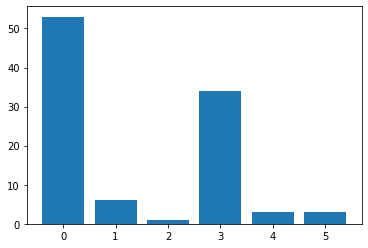

<IPython.core.display.Javascript object>

In [ ]:
plt.bar(df["avg_rating"].value_counts().index, df["avg_rating"].value_counts().values)
plt.xticks(df["avg_rating"].value_counts().index, df["avg_rating"].value_counts().index)

### Imbalanced data

In [ ]:
def imbalanced_data(num=1, seed=None):
    """
    """
    np.random.seed(seed)
    fake.seed_instance(seed)

    output = [
        {
            "name": fake.last_name(),
            "email": fake.free_email(),
            "country": np.random.choice(["United Kingdom", "France", "Belgium"]),
            
            "avg_rating": np.random.choice(
                np.arange(0, 6, 1), p=[0.5, 0.1, 0.1, 0.1, 0.1, 0.1]
            ),
            "long_tailed": np.random.lognormal(3, 1, 1)[0],
            "target": np.random.binomial(1, 0.05, 1)[0],
        }
        for x in range(num)
    ]
    return output

<IPython.core.display.Javascript object>

In [ ]:
%%time
df = pd.DataFrame(imbalanced_data(num=10000, seed=0))
df.head(5)

CPU times: user 3.5 s, sys: 19.8 ms, total: 3.51 s
Wall time: 3.51 s


name                    email  ... long_tailed target
0   Richard      gwilliams@yahoo.com  ...   21.560421      0
1  Sullivan        tammy59@gmail.com  ...   21.607520      1
2    Wagner       donald19@yahoo.com  ...    1.775435      0
3    Archer    kyleblair@hotmail.com  ...   12.768028      0
4    Rivera  gomezleslie@hotmail.com  ...   82.630362      0

[5 rows x 7 columns]

<IPython.core.display.Javascript object>

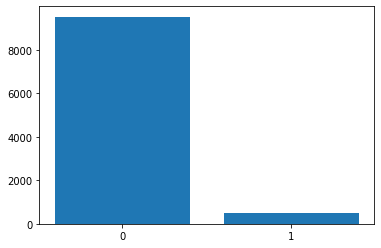

<IPython.core.display.Javascript object>

In [ ]:
x = df["target"].value_counts().index
y = df["target"].value_counts().values
plt.xticks(x, x)
_ = plt.bar(x, y)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
name           10000 non-null object
email          10000 non-null object
country        10000 non-null object
gender         10000 non-null object
avg_rating     10000 non-null int64
long_tailed    10000 non-null float64
target         10000 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


<IPython.core.display.Javascript object>

In [ ]:
df.to_csv("data/fake_data.csv")

<IPython.core.display.Javascript object>

The problem with creating synthetic datasets that have more than 1 feature is that there are no relationships between features, as they are random.
This leads to poor quality in terms of insights as all columns are independent from each other. 
